In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [19]:
path = r'/Users/carolinazea/Desktop/Data'

In [20]:
df = pd.read_csv(os.path.join(path, 'ba_customer.csv'), index_col = False)

In [21]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1.0,0.0,1.0,5.52,0.0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1.0,0.0,1.0,5.52,0.0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1.0,0.0,1.0,5.52,0.0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0.0,0.0,0.0,5.52,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         321 non-null    int64  
 1   sales_channel          321 non-null    object 
 2   trip_type              321 non-null    object 
 3   purchase_lead          321 non-null    int64  
 4   length_of_stay         321 non-null    int64  
 5   flight_hour            321 non-null    int64  
 6   flight_day             321 non-null    object 
 7   route                  321 non-null    object 
 8   booking_origin         321 non-null    object 
 9   wants_extra_baggage    320 non-null    float64
 10  wants_preferred_seat   320 non-null    float64
 11  wants_in_flight_meals  320 non-null    float64
 12  flight_duration        320 non-null    float64
 13  booking_complete       320 non-null    float64
dtypes: float64(5), int64(4), object(5)
memory usage: 35.2+ KB


In [23]:
# check columns

df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [24]:
# check for datatypes

df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage      float64
wants_preferred_seat     float64
wants_in_flight_meals    float64
flight_duration          float64
booking_complete         float64
dtype: object

In [25]:
# check for descriptive statistics

df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,321.000000,321.000000,321.000000,321.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.560748,122.249221,42.140187,9.389408,0.728125,0.184375,0.425000,8.162719,0.103125
std,1.007884,101.254353,41.935318,5.841747,0.445623,0.388397,0.495117,1.190955,0.304598
min,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.750000,0.000000
25%,1.000000,35.000000,21.000000,5.000000,0.000000,0.000000,0.000000,7.000000,0.000000
50%,1.000000,96.000000,27.000000,9.000000,1.000000,0.000000,0.000000,8.830000,0.000000
75%,2.000000,190.000000,44.000000,13.000000,1.000000,0.000000,1.000000,8.830000,0.000000
max,6.000000,419.000000,278.000000,23.000000,1.000000,1.000000,1.000000,8.830000,1.000000


In [26]:
# check for mixed type data
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
    
# result: no mixed datatypes

In [27]:
# check for missing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      1
wants_preferred_seat     1
wants_in_flight_meals    1
flight_duration          1
booking_complete         1
dtype: int64

In [29]:
# displays the number of rows and columns in a dataframe before deleted null values

df.shape

(321, 14)

In [30]:
# since there are less than 5% of missing values, we can drop all missing values is via the following command:

df.dropna(inplace = True)

In [31]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [32]:
# check number of rows and columns in dataframe after deleted null values

df.shape

(320, 14)

In [33]:
# find duplicates

df_dups = df[df.duplicated()]

In [34]:
# check column counts

df["num_passengers"].value_counts()

1    213
2     72
4     15
3     10
5      8
6      2
Name: num_passengers, dtype: int64

In [35]:

df["trip_type"].value_counts()

RoundTrip     313
OneWay          4
CircleTrip      3
Name: trip_type, dtype: int64

In [36]:
df["flight_hour"].value_counts()

8     27
9     26
7     23
4     22
6     22
3     22
14    20
10    19
13    18
2     18
23    12
12    12
11    11
1     10
16     9
15     8
20     7
0      7
5      7
17     6
21     5
19     4
22     3
18     2
Name: flight_hour, dtype: int64

In [37]:
df["flight_day"].value_counts()

Sun    56
Tue    53
Mon    52
Thu    45
Wed    40
Fri    39
Sat    35
Name: flight_day, dtype: int64

In [38]:
df["booking_origin"].value_counts()

New Zealand             153
Malaysia                 95
South Korea              28
India                     8
Germany                   5
Japan                     5
Singapore                 4
Czech Republic            2
Indonesia                 2
Vietnam                   2
China                     2
Switzerland               1
United Kingdom            1
Thailand                  1
Spain                     1
Romania                   1
Ireland                   1
Italy                     1
Slovakia                  1
United Arab Emirates      1
Tonga                     1
R\'e9union                1
(not set)                 1
Saudi Arabia              1
Netherlands               1
Name: booking_origin, dtype: int64

<AxesSubplot:xlabel='num_passengers', ylabel='Density'>

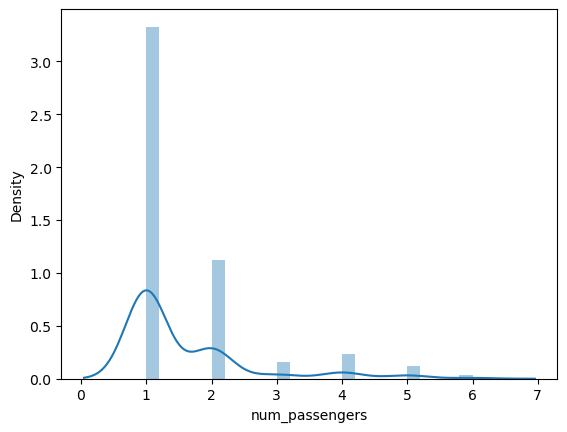

In [40]:
# shows extreme values

sns.distplot(df['num_passengers'], bins=25)

In [41]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [42]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [43]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

/Users/carolinazea/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='flight_day', ylabel='Density'>

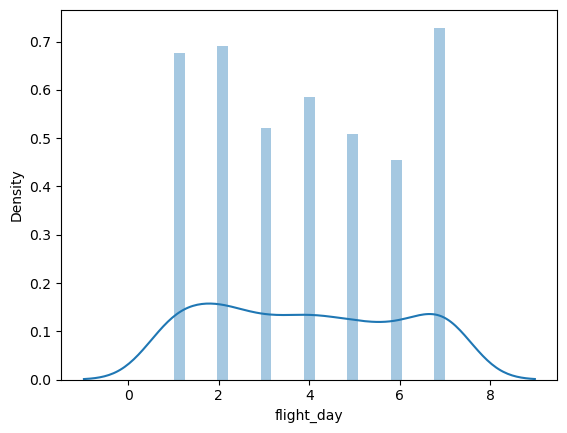

In [44]:
sns.distplot(df['flight_day'], bins=25)

##  Correlations

In [45]:
# Create a subset including 

sub = df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour','flight_duration', 'flight_day']]

In [46]:
sub

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,flight_day
0,2,262,19,7,5.52,6
1,1,112,20,3,5.52,6
2,2,243,22,17,5.52,3
3,1,96,31,4,5.52,6
4,2,68,22,15,5.52,3
...,...,...,...,...,...,...
315,1,69,28,14,8.83,4
316,5,206,17,13,8.83,7
317,1,6,21,3,8.83,5
318,2,23,31,4,8.83,1


In [58]:
# displays correlation between dataframe variables

df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.224301,-0.180788,0.016054,0.077053,0.109202,0.079953,0.099913,0.080578,0.036108
purchase_lead,0.224301,1.000000,-0.168151,0.102983,0.046972,-0.001480,0.027362,-0.026810,0.037238,-0.020986
length_of_stay,-0.180788,-0.168151,1.000000,-0.098032,-0.004713,0.094169,0.029020,0.030412,0.050020,0.057053
flight_hour,0.016054,0.102983,-0.098032,1.000000,-0.017348,0.054105,-0.061316,-0.061945,0.075468,0.060639
flight_day,0.077053,0.046972,-0.004713,-0.017348,1.000000,-0.120159,-0.020761,-0.016239,0.047348,-0.051180
wants_extra_baggage,0.109202,-0.001480,0.094169,0.054105,-0.120159,1.000000,0.145632,0.226973,-0.018627,-0.023744
wants_preferred_seat,0.079953,0.027362,0.029020,-0.061316,-0.020761,0.145632,1.000000,0.096586,0.057263,-0.028733
wants_in_flight_meals,0.099913,-0.026810,0.030412,-0.061945,-0.016239,0.226973,0.096586,1.000000,-0.081231,0.041053
flight_duration,0.080578,0.037238,0.050020,0.075468,0.047348,-0.018627,0.057263,-0.081231,1.000000,0.190287
booking_complete,0.036108,-0.020986,0.057053,0.060639,-0.051180,-0.023744,-0.028733,0.041053,0.190287,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

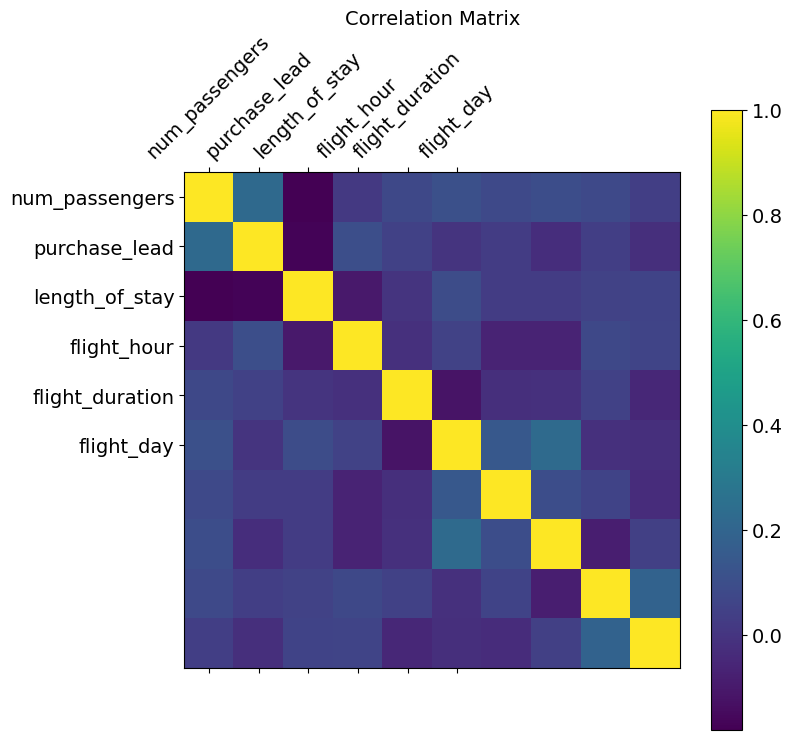

In [48]:
# create heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

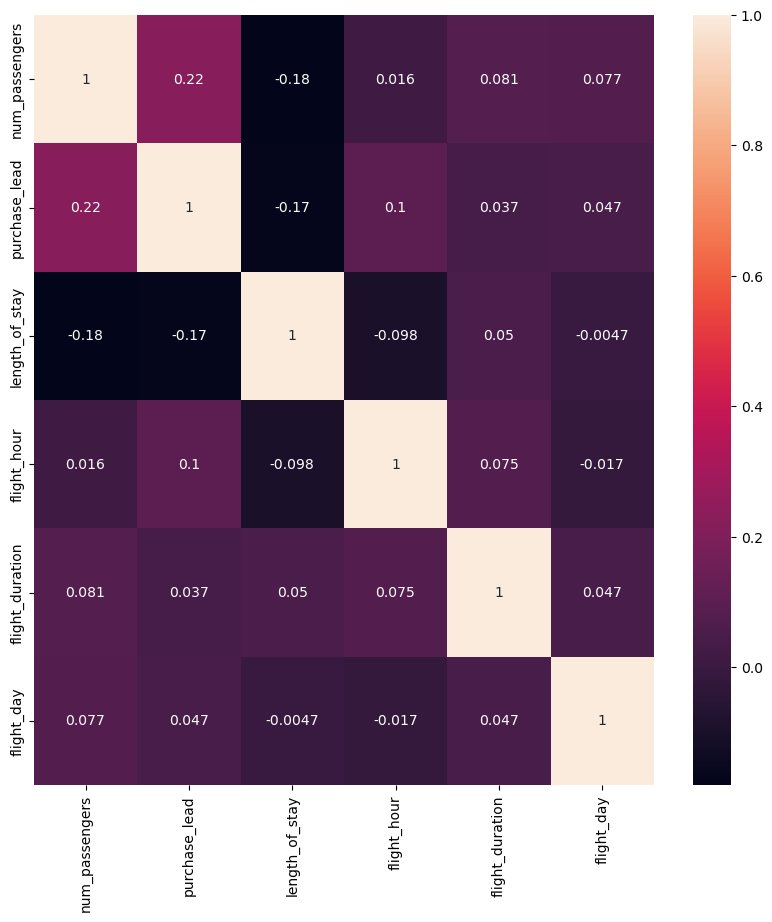

In [49]:
# create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# create the correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [52]:
# create a dataframe to include number of passengers and the length of stay

data_to_plot = df[['num_passengers','length_of_stay']]
data_to_plot.head()

,num_passengers,length_of_stay
0,2,19
1,1,20
2,2,22
3,1,31
4,2,22


In [53]:
# create a dataframe to include flight day and time of flight

data_to_plot = df[['flight_day','flight_hour']]
data_to_plot.head()

,flight_day,flight_hour
0,6,7
1,6,3
2,3,17
3,6,4
4,3,15


In [60]:
import sklearn

In [62]:
# import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour','flight_duration', 'flight_day']]  # Features
y=df['route']

# split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

In [63]:
# import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [64]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9895833333333334


In [ ]:
### .98 evaluation metric which measured the number of correct predictions made by model.